<a href="https://colab.research.google.com/github/luccidomingues/NBA-Web-Scraping/blob/main/Webscraping_Lazypredict_Regressors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using pandas read_html to Web Scrape Data

In this notebook, I will be showing you how to easily web scrape data using pandas read_html() function for your data science project. We will be web scraping NBA player stats data and perform a quick data exploration.

URL to the webpage "2018-19 NBA Player Stats: Per Game"

Method 1

We could modularize the URL and year strings of text that may be useful for programmatic access (in the subsequent code cell).

In [1]:
! pip install lazypredict

     |████████████████████████████████| 81kB 5.9MB/s 
     |████████████████████████████████| 25.9MB 1.5MB/s 
     |████████████████████████████████| 307kB 49.3MB/s 
     |████████████████████████████████| 1.2MB 48.6MB/s 
     |████████████████████████████████| 256kB 58.4MB/s 
     |████████████████████████████████| 276kB 35.5MB/s 
     |████████████████████████████████| 14.5MB 144kB/s 
     |████████████████████████████████| 6.8MB 43.0MB/s 
     |████████████████████████████████| 10.1MB 31.0MB/s 
     |████████████████████████████████| 127.6MB 43kB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44620 sha256=0b9de23f4b7ab1a9d81cfff02f1f44e314aa9c086faad8bffe5ef3f88697fe2a
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built PyYAML
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.19.1 which is incompatible.
ERROR: google-colab 1.0.0 has requiremen

In [2]:
# The Building Blocks
year = '2019'

str = 'https://www.basketball-reference.com/leagues/NBA_{}_per_game.html'

# Combining the URL + year strings together
url = str.format(year)
url

'https://www.basketball-reference.com/leagues/NBA_2019_per_game.html'

In [3]:

years = [2015,2016,2017,2018,2019]
str = 'https://www.basketball-reference.com/leagues/NBA_{}_per_game.html'

for year in years:
  url = str.format(year)
  print(url)

https://www.basketball-reference.com/leagues/NBA_2015_per_game.html
https://www.basketball-reference.com/leagues/NBA_2016_per_game.html
https://www.basketball-reference.com/leagues/NBA_2017_per_game.html
https://www.basketball-reference.com/leagues/NBA_2018_per_game.html
https://www.basketball-reference.com/leagues/NBA_2019_per_game.html


In [1]:
url = 'https://www.basketball-reference.com/leagues/NBA_2020_totals.html'


Read HTML webpage into pandas

In [2]:
import pandas as pd

Using pd.read_html() function to read HTML webpage

In [3]:
df = pd.read_html(url, header = 0)
df

[      Rk                    Player Pos Age   Tm  ... STL BLK  TOV   PF   PTS
 0      1              Steven Adams   C  26  OKC  ...  51  67   94  122   684
 1      2               Bam Adebayo  PF  22  MIA  ...  82  93  204  182  1146
 2      3         LaMarcus Aldridge   C  34  SAS  ...  36  87   74  128  1001
 3      4            Kyle Alexander   C  23  MIA  ...   0   0    1    1     2
 4      5  Nickeil Alexander-Walker  SG  21  NOP  ...  17   8   54   57   267
 ..   ...                       ...  ..  ..  ...  ...  ..  ..  ...  ...   ...
 672  525                Trae Young  PG  21  ATL  ...  65   8  289  104  1778
 673  526               Cody Zeller   C  27  CHO  ...  40  25   75  140   642
 674  527              Tyler Zeller   C  30  SAS  ...   0   0    0    0     2
 675  528                Ante Žižić   C  23  CLE  ...   7   5   10   27    96
 676  529               Ivica Zubac   C  22  LAC  ...  16  66   61  168   596
 
 [677 rows x 30 columns]]

How many tables are there in the webpage?

In [4]:
len(df)

1

Select the first table¶

In [5]:
df[0]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Steven Adams,C,26,OKC,63,63,1680,283,478,.592,1,3,.333,282,475,.594,.593,117,201,.582,207,376,583,146,51,67,94,122,684
1,2,Bam Adebayo,PF,22,MIA,72,72,2417,440,790,.557,2,14,.143,438,776,.564,.558,264,382,.691,176,559,735,368,82,93,204,182,1146
2,3,LaMarcus Aldridge,C,34,SAS,53,53,1754,391,793,.493,61,157,.389,330,636,.519,.532,158,191,.827,103,289,392,129,36,87,74,128,1001
3,4,Kyle Alexander,C,23,MIA,2,0,13,1,2,.500,0,0,NaN,1,2,.500,.500,0,0,NaN,2,1,3,0,0,0,1,1,2
4,5,Nickeil Alexander-Walker,SG,21,NOP,47,1,591,98,266,.368,46,133,.346,52,133,.391,.455,25,37,.676,9,75,84,89,17,8,54,57,267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,525,Trae Young,PG,21,ATL,60,60,2120,546,1249,.437,205,568,.361,341,681,.501,.519,481,559,.860,32,223,255,560,65,8,289,104,1778
673,526,Cody Zeller,C,27,CHO,58,39,1341,251,479,.524,18,75,.240,233,404,.577,.543,122,179,.682,160,251,411,88,40,25,75,140,642
674,527,Tyler Zeller,C,30,SAS,2,0,4,1,4,.250,0,0,NaN,1,4,.250,.250,0,0,NaN,3,1,4,0,0,0,0,0,2
675,528,Ante Žižić,C,23,CLE,22,0,221,41,72,.569,0,0,NaN,41,72,.569,.569,14,19,.737,18,48,66,6,7,5,10,27,96


In [6]:
df2020 = df[0]


Data cleaning
We can see that the table header is presented multiple times in several rows.

In [7]:
df2020[df2020.Age == 'Age']

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
22,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
53,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
76,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
101,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
130,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
163,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
192,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
219,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
242,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
271,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [8]:
len(df2020[df2020.Age == 'Age'])

26

In [9]:
df = df2020.drop(df2020[df2020.Age == 'Age'].index)

In [10]:
df.shape

(651, 30)

In [11]:
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Steven Adams,C,26,OKC,63,63,1680,283,478,.592,1,3,.333,282,475,.594,.593,117,201,.582,207,376,583,146,51,67,94,122,684
1,2,Bam Adebayo,PF,22,MIA,72,72,2417,440,790,.557,2,14,.143,438,776,.564,.558,264,382,.691,176,559,735,368,82,93,204,182,1146
2,3,LaMarcus Aldridge,C,34,SAS,53,53,1754,391,793,.493,61,157,.389,330,636,.519,.532,158,191,.827,103,289,392,129,36,87,74,128,1001
3,4,Kyle Alexander,C,23,MIA,2,0,13,1,2,.500,0,0,NaN,1,2,.500,.500,0,0,NaN,2,1,3,0,0,0,1,1,2
4,5,Nickeil Alexander-Walker,SG,21,NOP,47,1,591,98,266,.368,46,133,.346,52,133,.391,.455,25,37,.676,9,75,84,89,17,8,54,57,267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,525,Trae Young,PG,21,ATL,60,60,2120,546,1249,.437,205,568,.361,341,681,.501,.519,481,559,.860,32,223,255,560,65,8,289,104,1778
673,526,Cody Zeller,C,27,CHO,58,39,1341,251,479,.524,18,75,.240,233,404,.577,.543,122,179,.682,160,251,411,88,40,25,75,140,642
674,527,Tyler Zeller,C,30,SAS,2,0,4,1,4,.250,0,0,NaN,1,4,.250,.250,0,0,NaN,3,1,4,0,0,0,0,0,2
675,528,Ante Žižić,C,23,CLE,22,0,221,41,72,.569,0,0,NaN,41,72,.569,.569,14,19,.737,18,48,66,6,7,5,10,27,96


In [12]:
df.isnull().sum()

Rk         0
Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        2
3P         0
3PA        0
3P%       35
2P         0
2PA        0
2P%        6
eFG%       2
FT         0
FTA        0
FT%       33
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64

In [13]:
df.dropna(inplace=True)
df.isnull().sum()


Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

### Model from original X-Y pairs

In [14]:
# Data set
# X = df.drop(['Player','Pos','Tm','Rk','PTS'], axis=1)
# X = df[["2P","3P","G","GS","MP","FG"]]
X = df[["G","3P"]]
Y = df.iloc[:,-1]

# Convert to float
X = X.astype(float, errors = 'raise')
Y = Y.astype(float, errors = 'raise')

X


,G,3P
0,63.0,1.0
1,72.0,2.0
2,53.0,61.0
4,47.0,46.0
5,38.0,57.0
...,...,...
670,4.0,2.0
671,64.0,79.0
672,60.0,205.0
673,58.0,18.0


## LazyRegressors

In [15]:
# Import libraries
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np
from sklearn.model_selection import train_test_split


# Original load and split
# -----------------------
# Load dataset
# boston = datasets.load_boston()
# X, y = shuffle(boston.data, boston.target, random_state=42)

# Data split
# X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =42)
# -----------------------


# Data split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


# Defines and builds the lazyclassifier
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None)
models_train,predictions_train = reg.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = reg.fit(X_train, X_test, Y_train, Y_test)

# Prints the model performance
models_train

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
100%|██████████| 42/42 [00:00<00:00, 4778.41it/s]

tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to execute
'tuple' object is not callable
tuple model failed to ex

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,1.00,1.00,11.92,0.01
ExtraTreeRegressor,1.00,1.00,11.92,0.01
ExtraTreesRegressor,1.00,1.00,11.92,0.16
XGBRegressor,1.00,1.00,22.01,0.15
RandomForestRegressor,0.95,0.95,88.37,0.27
BaggingRegressor,0.93,0.93,105.61,0.04
GradientBoostingRegressor,0.86,0.86,151.43,0.11
HistGradientBoostingRegressor,0.83,0.83,169.09,0.23
LGBMRegressor,0.82,0.82,171.13,0.05


In [16]:
models_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,


In [17]:
[0 if i < 0 else i for i in models_train.iloc[:,0] ]

[0.9991444626921332,
 0.9991444626921332,
 0.9991444624367978,
 0.9970810853011455,
 0.9529409121494382,
 0.9327889754952835,
 0.8618180145908767,
 0.8277060352201068,
 0.8235306964364272,
 0.8099306105757197,
 0.7653306979771062,
 0.72907938026863,
 0.7143907789286601,
 0.7143907789286601,
 0.7143907789286601,
 0.7143907789286601,
 0.7143907789286601,
 0.7143907789286601,
 0.7143907789286601,
 0.7143893911233128,
 0.7143893911233126,
 0.7143885285234518,
 0.7143834964090083,
 0.7143770963566494,
 0.7143617070831788,
 0.7109341293459683,
 0.6938354068986494,
 0.6934260519486533,
 0.681391958732207,
 0.67324809243894,
 0.6643798140949023,
 0.6328879891141037,
 0.613158842434727,
 0.6093320356910772,
 0.6093320356910772,
 0.5971449915950333,
 0.3654553440612709,
 0.1873268085399833,
 0.16007138082945993,
 0,
 0,
 0]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text major ticklabel objects>)

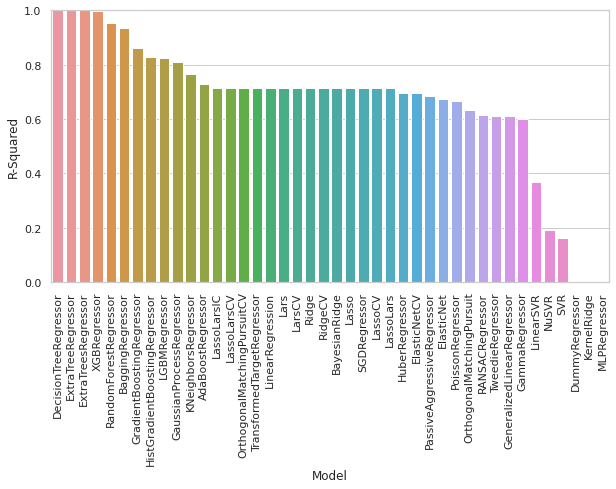

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=models_train.index, y="R-Squared", data=models_train)
ax.set(ylim=(0, 1))
plt.xticks(rotation=90)

[(0.0, 1.0)]

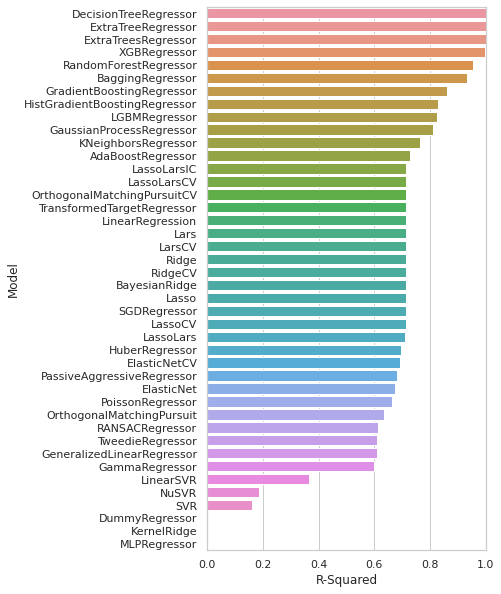

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

models_train["R-Squared"] = [0 if i < 0 else i for i in models_train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_train.index, x="R-Squared", data=models_train)
ax.set(xlim=(0, 1))